In [27]:
import pandas_datareader.data as wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('/content/all_banks.pkl')
df

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

In [29]:
df.xs(key='Close', axis='columns', level=1)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.90,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.80,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.20,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.20,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.90,130.39,40.67,59.19,31.68
...,...,...,...,...,...,...
2015-12-24,17.27,52.71,182.47,66.60,32.48,54.82
2015-12-28,17.13,52.38,181.62,66.38,32.17,54.68
2015-12-29,17.28,52.98,183.53,67.07,32.55,55.29


In [3]:
# What is the max Close price for each bank's stock throughout the time period?

df.xs(key='Close', axis='columns', level=1).max()

,0
Bank Ticker,
BAC,54.90
C,564.10
GS,247.92
JPM,70.08
MS,89.30
WFC,58.52


In [4]:
df.columns.levels[0]

Index(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], dtype='object', name='Bank Ticker')

In [5]:
# Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.

banks = df.columns.levels[0]
close_values = df.xs(key='Close', axis='columns', level=1)

returns = pd.DataFrame(index=close_values.index)
for bank in banks:
    data = { bank: [0] }
    for i, close in enumerate(close_values[bank][1:]):
        data[bank].append((close_values[bank].iloc[i+1] / close_values[bank].iloc[i]) - 1)
    returns[bank] = data[bank]

In [6]:
returns

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


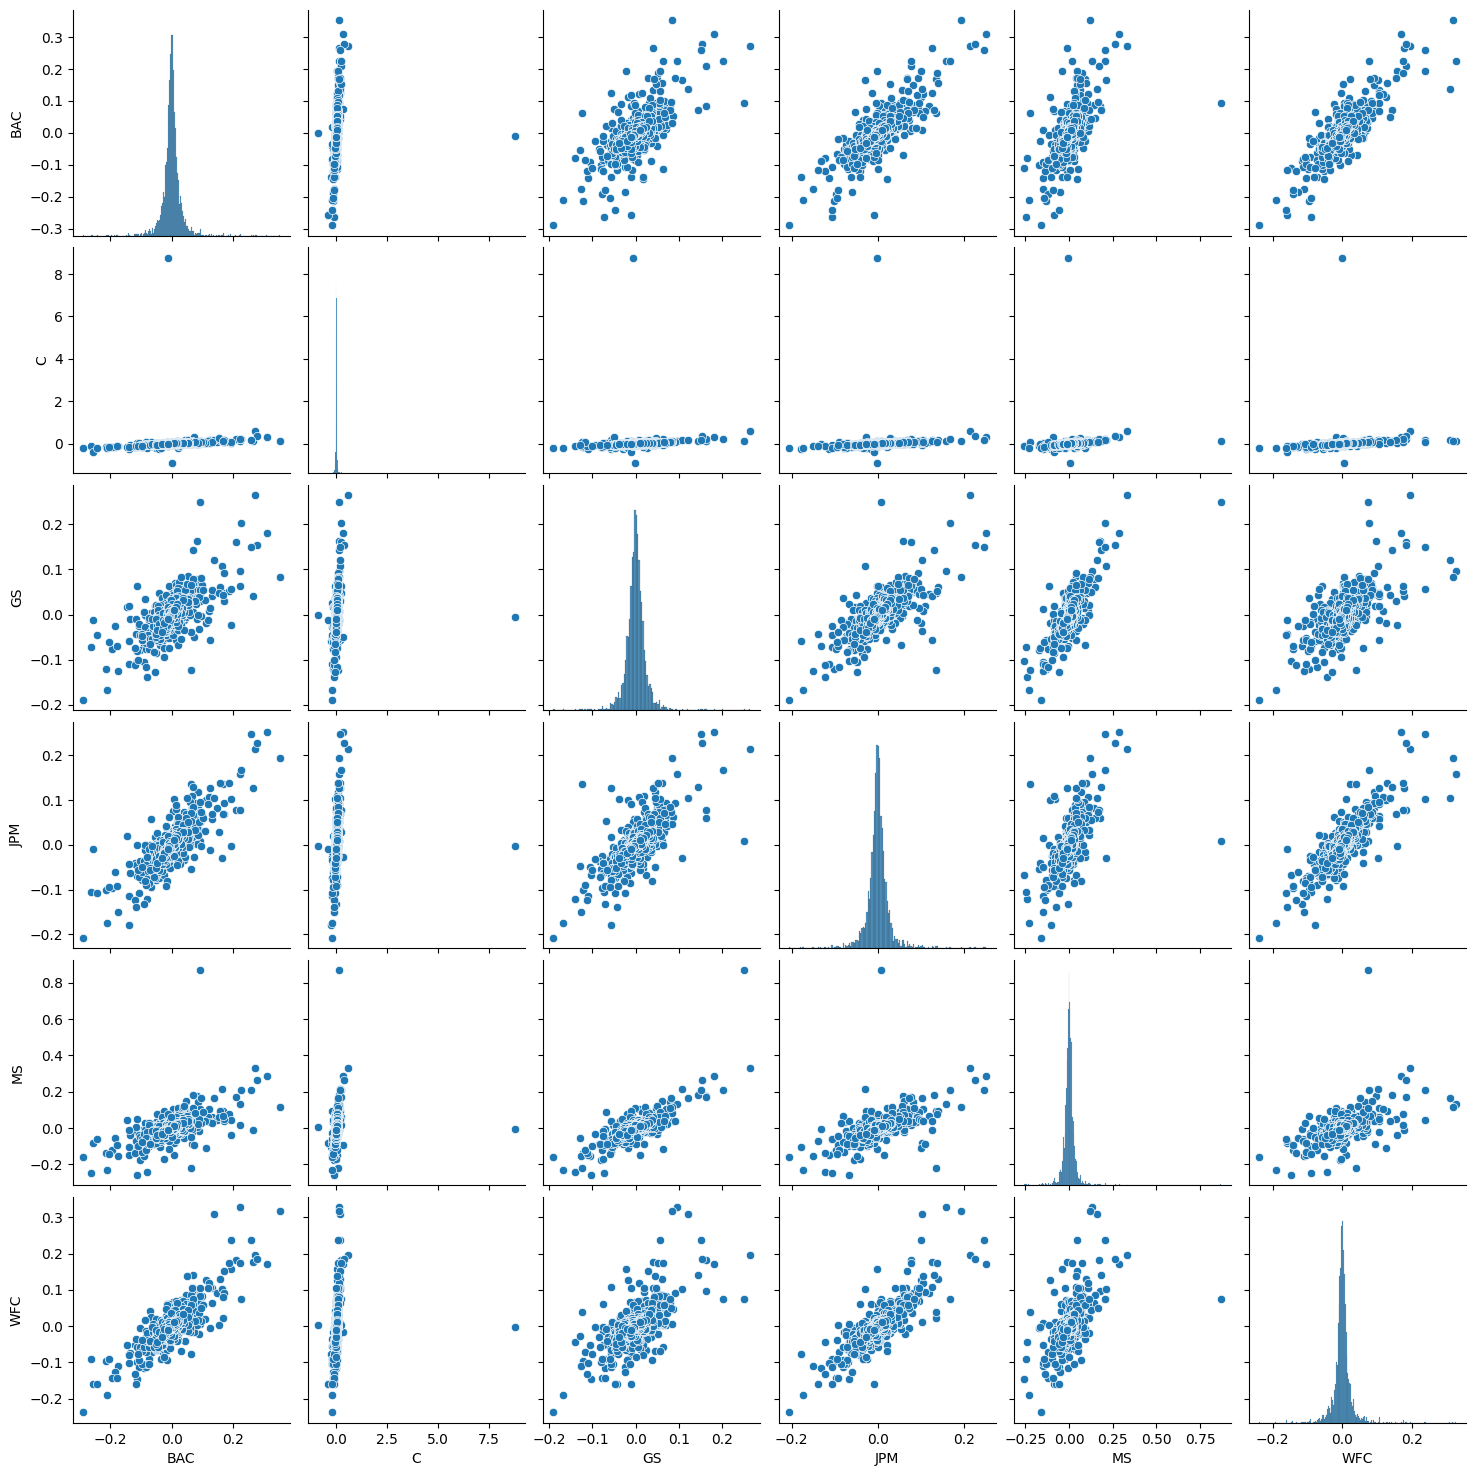

In [7]:
#Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?
sns.pairplot(data=returns)

The CitiGroup has a spike in its returns, most likely, it's an outlier or something happened at the time, which was really beneficial to its stocks, making them so much higher than the others.

In [8]:
# Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.

In [9]:
# Best

returns.idxmax()

,0
BAC,2009-04-09
C,2011-05-09
GS,2008-11-24
JPM,2009-01-21
MS,2008-10-13
WFC,2008-07-16


In [10]:
# Worst

returns.idxmin()

,0
BAC,2009-01-20
C,2011-05-06
GS,2009-01-20
JPM,2009-01-20
MS,2008-10-09
WFC,2009-01-20


For 4 of these stocks, the worst return happened at the same day, 2009-01-20, which was the day Barack Obama was inaugurated as president of the USA.

Weirdly, CitiGroup has its best and worst return within a very short timestamp. At that period of time, the conflict in Syria intesified in result of some uprisings against the government. However, this behavior, was caused by a stock split.

In [11]:
#  Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period?

In [12]:
returns.std()

,0
BAC,0.036643
C,0.179933
GS,0.025341
JPM,0.027651
MS,0.037813
WFC,0.030227


CitiGroup stock would be the riskiest over the years because it has the biggest standard deviation, which means that it's more likely to have bigger falls than the other ones.

In [ ]:
# Which would you classify as the riskiest for the year 2015?

In [19]:
returns_2015 = returns.apply(lambda x: x['2015-01-01':'2015-12-31'])
returns_2015

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189
2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422
2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865
2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951
2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [20]:
returns_2015.std()

,0
BAC,0.016163
C,0.015289
GS,0.014046
JPM,0.014017
MS,0.016249
WFC,0.012591


Following the same logic as the previous question, the riskiest stock in 2015 would be from the Bank of America.

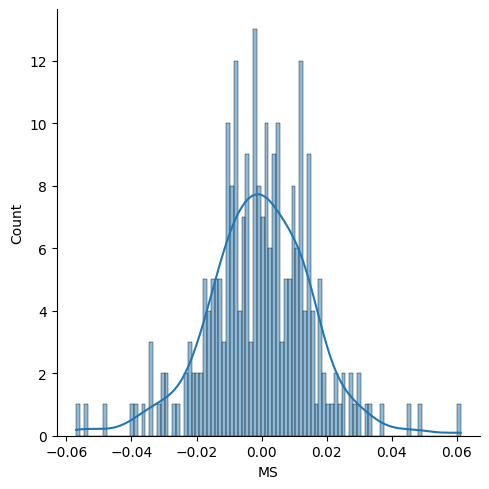

In [25]:
# Create a distplot using seaborn of the 2015 returns for Morgan Stanley

sns.displot(data=returns_2015['MS'], kde=True, bins=100)

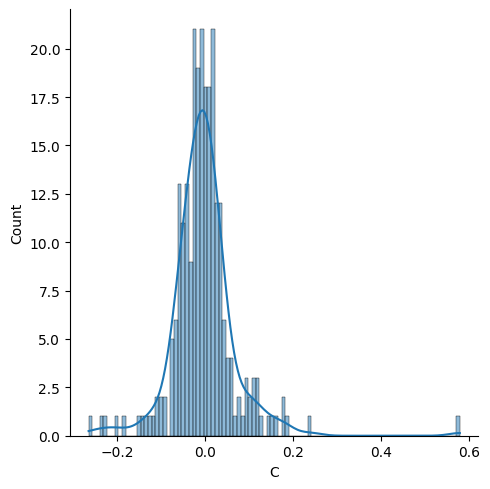

In [26]:
# Create a distplot using seaborn of the 2008 returns for CitiGroup

returns_2008 = returns.apply(lambda x: x['2008-01-01':'2008-12-31'])
sns.displot(data=returns_2008['C'], kde=True, bins=100)

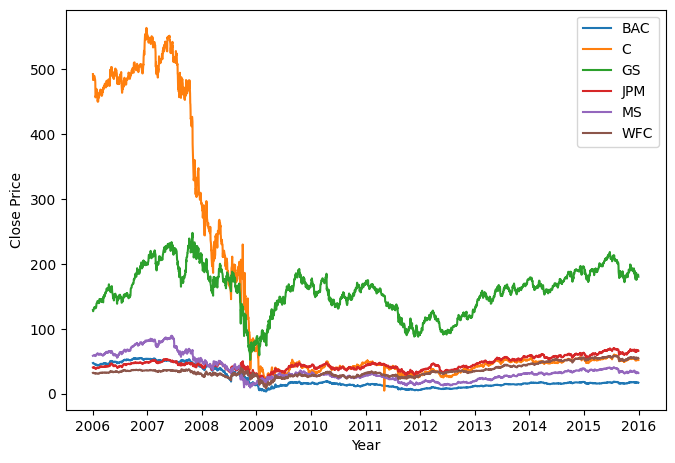

In [34]:
# Create a line plot showing Close price for each bank for the entire index of time.

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])

for bank in banks:
    ax.plot(df.index, df.xs(key='Close', axis='columns', level=1)[bank], label=bank)

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.show()

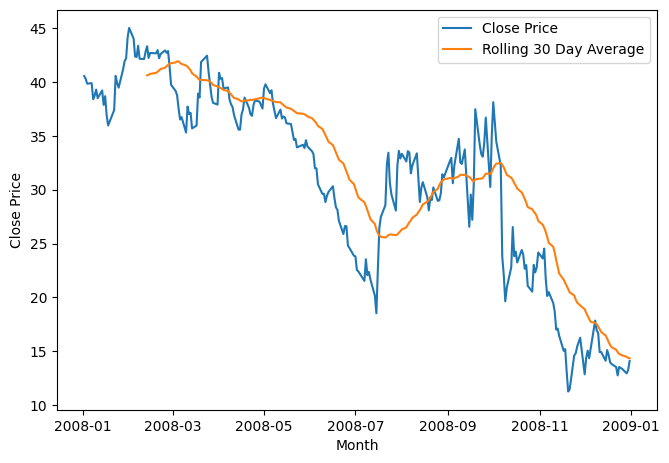

In [38]:
# Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

df_2008 = df.xs(key='Close', axis='columns', level=1)['BAC']['2008-01-01':'2008-12-31']
fig = plt.figure(figsize=(6, 4))

ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df_2008.index, df_2008, label='Close Price')
ax.plot(df_2008.index, df_2008.rolling(window=30).mean(), label='Rolling 30 Day Average')

plt.xlabel('Month')
plt.ylabel('Close Price')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

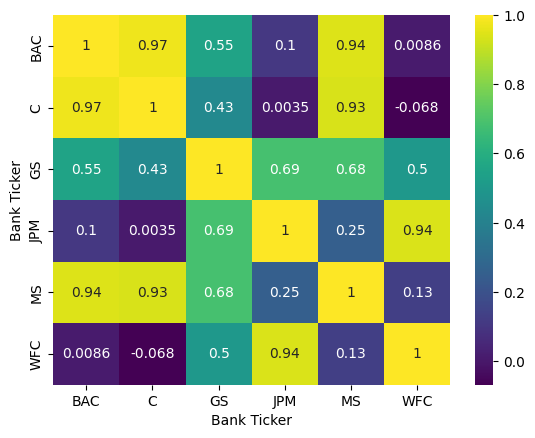

In [40]:
sns.heatmap(data=df.xs(key='Close', axis='columns', level=1).corr(), annot=True, cmap='viridis')